In [21]:
#https://www.kaggle.com/code/rehabahmedkhalifa/credit-classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [22]:
df=pd.read_csv("credit_train.csv" ,sep="," ,encoding="utf-8")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [23]:
df = df.dropna(subset=['Credit Score', 'Annual Income'])
df['Months since last delinquent']=df['Months since last delinquent'].fillna(0)
df['Bankruptcies']=df['Bankruptcies'].fillna(0)
df = df.drop_duplicates(subset=['Loan ID'])
df['Credit Score'] = df['Credit Score'].astype(int)

#Convert 'Credit Score' to string and remove last digit if it has four digits
# for i in range(len(df['Credit Score'])):
#     # Check if the length of the value is 4 digits
#     print(len(str(df['Credit Score'][i])))
#     if len(str(df['Credit Score'][i])) == 4:
#         #print(str(df['Credit Score'][i]))
#         # Remove the last digit
#         df['Credit Score'][i] = int(str(df['Credit Score'][i])[:-1])

#df['modified_credit_scores'] = [int(str(score)[:3] + str(score)[4:]) if str(score)[3] == '0' else score for score in df['Credit Score']]

df['Credit Score'] = df['Credit Score'].astype(str).apply(lambda x: x[:-1] if len(x) == 4 else x)

# Convert 'Credit Score' back to numeric type
#df['Credit Score'] = pd.to_numeric(df['Credit Score'], errors='coerce')
df.drop(df[["Tax Liens"]] ,axis =1 ,inplace =True)
df["Debt to Income Ratio"] = df["Monthly Debt"]/(df["Annual Income"]/12)
df.info()
df.to_csv('cleaned.csv', index=False)



<class 'pandas.core.frame.DataFrame'>
Index: 67052 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       67052 non-null  object 
 1   Customer ID                   67052 non-null  object 
 2   Loan Status                   67052 non-null  object 
 3   Current Loan Amount           67052 non-null  float64
 4   Term                          67052 non-null  object 
 5   Credit Score                  67052 non-null  object 
 6   Annual Income                 67052 non-null  float64
 7   Years in current job          64196 non-null  object 
 8   Home Ownership                67052 non-null  object 
 9   Purpose                       67052 non-null  object 
 10  Monthly Debt                  67052 non-null  float64
 11  Years of Credit History       67052 non-null  float64
 12  Months since last delinquent  67052 non-null  float64
 13  Number

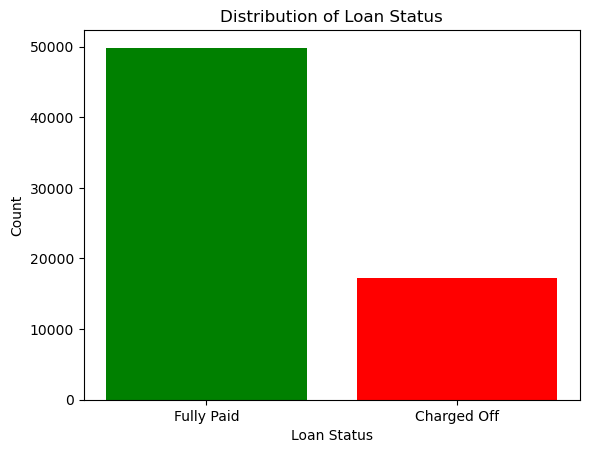

In [24]:
status_counts = df['Loan Status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

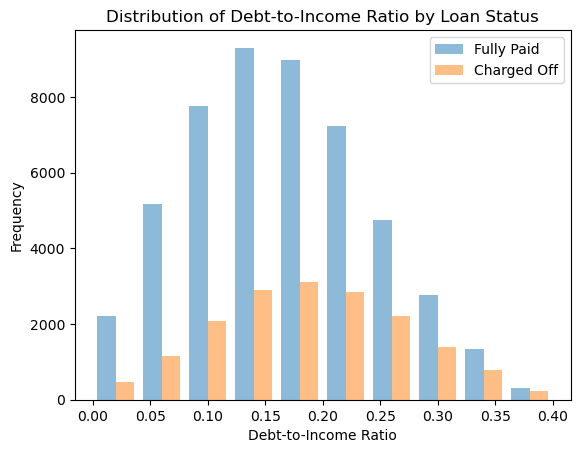

In [25]:
#Debt to Income Ratio by Loan Status

grouped_data = df.groupby('Loan Status')['Debt to Income Ratio']

# Create a histogram for each group
plt.hist([grouped_data.get_group(status) for status in df['Loan Status'].unique()],
         bins=10, alpha=0.5, label=df['Loan Status'].unique())

# Adding labels and title
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt-to-Income Ratio by Loan Status')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [32]:

df['Purpose'].value_counts()

Purpose
Debt Consolidation      52877
Other                    6073
Home Improvements        3931
Business Loan            1211
Buy a Car                 882
Medical Bills             726
Buy House                 441
Vacation                  424
major_purchase            246
moving                     98
wedding                    73
Educational Expenses       70
Name: count, dtype: int64

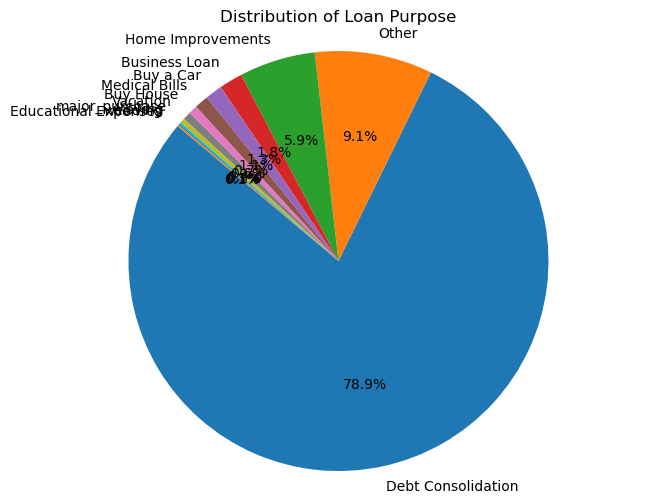

In [31]:
# Count the occurrences of each loan purpose
df['Purpose'].replace({'small_business': 'Business Loan'}, inplace=True)
df['Purpose'].replace({'other': 'Other','renewable_energy':'Other'}, inplace=True)
df['Purpose'].replace({'Take a Trip': 'Vacation','vacation':'Vacation'}, inplace=True)
#df['Purpose'].replace({'vaction': 'Vacation'}, inplace=True)
df['Purpose'].value_counts()

loan_purpose_counts = df['Purpose'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.pie(loan_purpose_counts, labels=loan_purpose_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Loan Purpose')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [33]:
# Create a linear regression between loan status and credit score